In [1]:
import matplotlib.pyplot as plt
import time
from gengraph import EpsimGraph
from epsim import Epsim

In [6]:
# Testrun

starttime = time.time()
epsim_graph = EpsimGraph(k=100000, office_sigma=0.5, split_classes=False)
sim = Epsim()
sim.init_from_dicts(epsim_graph.family_nbrs, epsim_graph.school_nbrs, epsim_graph.office_nbrs)
sim.run_sim(sim_iters=200, family_spread_prob=0.3, school_office_spread_prob=0.1, immunize_prob=0.0,\
           testing_prob=0.95, quarantine_prob=0.25, print_progress=True, export_csv=False)
print('runtime: {}s'.format(time.time() - starttime))

creating graph with k=100000, office_sigma=0.5
randomly cluster children and parent nodes, such that there are child-parent pairs
parents: 1/2 no change, 1/4 merge 2 nodes, 1/8 merge 3 nodes, ...
parents: duplicate every node
children: k/l^2 many l*l grids, place l^2 nodes randomly on grid, cluster 8 neighbourhood, with l=5
parents: cluster 1-office_sigma no change, office_sigma*1/2 cluster 2 nodes, office_sigma*1/4 cluster 3 nodes, office_sigma*1/8 cluster 4 nodes, office_sigma*1/8 cluster 5 nodes
starting simulation with n=238640, num_start_nodes=24, sim_iters=200
family_spread_prob=0.3, school_office_spread_prob=0.1, immunize_prob=0.0, testing_prob=0.95, quarantine_prob=0.25
0: [238616, 24, 0, 0, 0, 0]
1: [238616, 0, 24, 0, 0, 0]
2: [238590, 26, 0, 24, 0, 0]
3: [238574, 42, 0, 0, 24, 0]
4: [238574, 16, 26, 0, 0, 24]
5: [238563, 11, 16, 26, 0, 24]
6: [238547, 27, 0, 16, 26, 24]
7: [238538, 21, 10, 0, 8, 63]
8: [238532, 13, 14, 10, 0, 71]
9: [238517, 21, 7, 14, 10, 71]
10: [238499, 33

In [16]:
# Run with different parameters

sim_iters = 300
k = 100000
office_sigma = 0.25
family_spread_prob = 0.3
school_office_spread_probs = [0.14, 0.12, 0.1, 0.08]
immunize_prob = 0.0
testing_probs = [0.95]
quarantine_probs = [0.25, 0.5]

results = {}
for testing_prob in testing_probs:
    results[testing_prob] = {}
    for quarantine_prob in quarantine_probs:
        results[testing_prob][quarantine_prob] = {}

starttime = time.time()
epsim_graph = EpsimGraph(k, office_sigma, split_classes=False)
sim = Epsim()
sim.init_from_dicts(epsim_graph.family_nbrs, epsim_graph.school_nbrs, epsim_graph.office_nbrs)
for testing_prob in testing_probs:
    for quarantine_prob in quarantine_probs:
        for school_office_spread_prob in school_office_spread_probs:
                x_rounds, y_num_infected = sim.run_sim(sim_iters, family_spread_prob, school_office_spread_prob, immunize_prob, testing_prob, quarantine_prob)
                results[testing_prob][quarantine_prob][school_office_spread_prob] = (x_rounds, y_num_infected)
print('runtime: {}s'.format(time.time() - starttime))

creating graph with k=100000, office_sigma=0.25
randomly cluster children and parent nodes, such that there are child-parent pairs
parents: 1/2 no change, 1/4 merge 2 nodes, 1/8 merge 3 nodes, ...
parents: duplicate every node
children: k/l^2 many l*l grids, place l^2 nodes randomly on grid, cluster 8 neighbourhood, with l=5
parents: cluster 1-office_sigma no change, office_sigma*1/2 cluster 2 nodes, office_sigma*1/4 cluster 3 nodes, office_sigma*1/8 cluster 4 nodes, office_sigma*1/8 cluster 5 nodes
starting simulation with n=238640, num_start_nodes=24, sim_iters=300
family_spread_prob=0.3, school_office_spread_prob=0.14, immunize_prob=0.0, testing_prob=0.95, quarantine_prob=0.25
infected nodes: 81412

starting simulation with n=238640, num_start_nodes=24, sim_iters=300
family_spread_prob=0.3, school_office_spread_prob=0.12, immunize_prob=0.0, testing_prob=0.95, quarantine_prob=0.25
infected nodes: 51749

starting simulation with n=238640, num_start_nodes=24, sim_iters=300
family_sprea

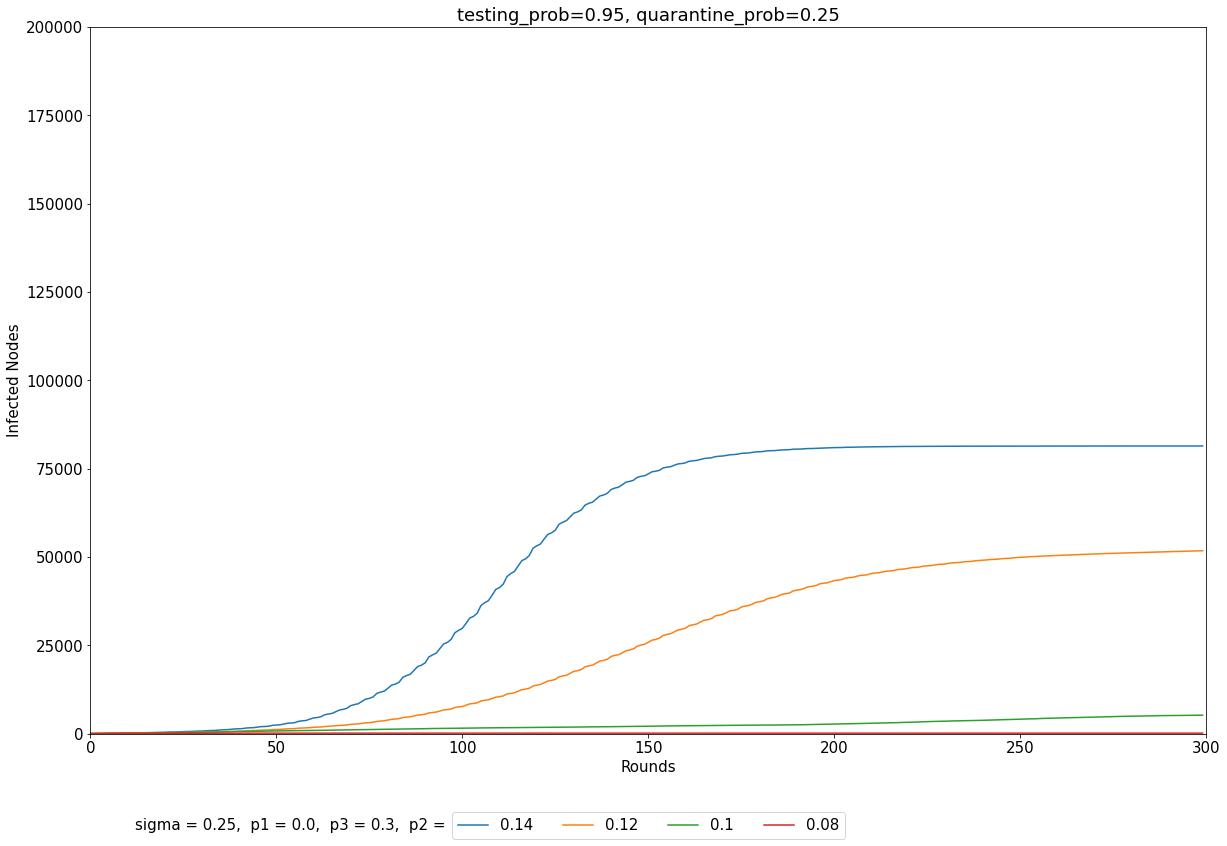

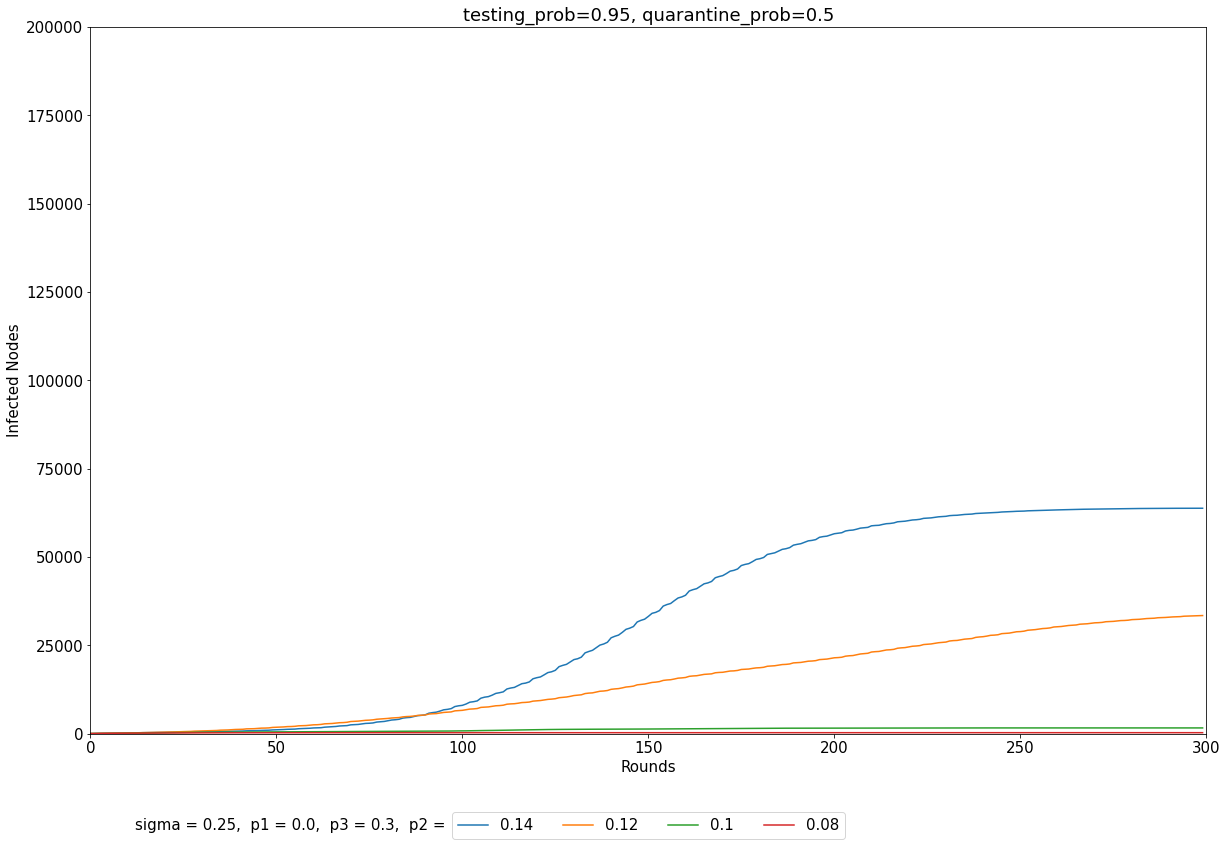

In [17]:
plt.rcParams.update({'font.size': 15})
linestyles = ['solid', 'dotted', 'dashdot', 'dashed']

for testing_prob in testing_probs:
    for quarantine_prob in quarantine_probs:
        fig, axs = plt.subplots(figsize=(20,13))
        axs.set_ylim(top=200000)
        axs.set_xlim(0, 300)
        for school_office_spread_prob in school_office_spread_probs:
            axs.plot(results[testing_prob][quarantine_prob][school_office_spread_prob][0], results[testing_prob][quarantine_prob][school_office_spread_prob][1], label=school_office_spread_prob)
        axs.set_title('testing_prob={}, quarantine_prob={}'.format(testing_prob, quarantine_prob))
        axs.set_xlabel('Rounds')
        axs.set_ylabel('Infected Nodes')
        axs.text(0.04, -0.136, 'sigma = {},  p1 = {},  p3 = {},  p2 ='.format(office_sigma, immunize_prob, family_spread_prob), transform=axs.transAxes)
        axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6)